In [2]:

import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

import sys
import os
sys.path.append(os.path.abspath("../src"))

from utils import get_dataloaders
from model import get_resnet18_model

c:\Users\Avani Bhat\Desktop\Brain Tumor Classification Project\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Avani Bhat\Desktop\Brain Tumor Classification Project\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<Figure size 3200x3000 with 0 Axes>

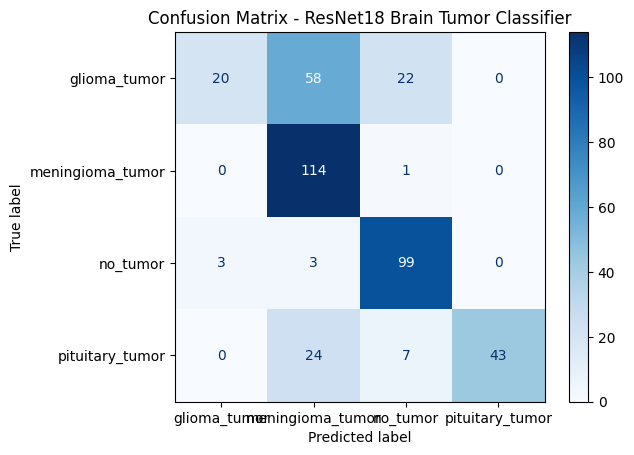

In [8]:
# Load class names
_, test_loader, class_names = get_dataloaders("../data/brain_tumor_dataset", batch_size=16, model_type="resnet")

# Load trained model
model = get_resnet18_model(num_classes=len(class_names))
model.load_state_dict(torch.load("../resnet18_model.pth", map_location="cpu"))  # adjust path if needed
model.eval()

# Get predictions and true labels
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot it
plt.figure(figsize=(32, 30))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix - ResNet18 Brain Tumor Classifier")
plt.show()

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


                  precision    recall  f1-score   support

    glioma_tumor       0.87      0.20      0.33       100
meningioma_tumor       0.57      0.99      0.73       115
        no_tumor       0.77      0.94      0.85       105
 pituitary_tumor       1.00      0.58      0.74        74

        accuracy                           0.70       394
       macro avg       0.80      0.68      0.66       394
    weighted avg       0.78      0.70      0.66       394

